In [ ]:
import numpy as np
import pandas as pd
# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from imblearn.over_sampling import SMOTE #a statistical technique for increasing the number of cases in your dataset in a balanced way
#utilizing a k-nearest neighbour algorithm to create synthetic data.
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
#from sklearn.metrics import precision_score, recall_scorex
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
import xgboost as xgb

In [ ]:
df= pd.read_csv("/content/HR analytics.csv")

FileNotFoundError: ignored

In [ ]:
df

In [ ]:
df.isna().sum()

In [ ]:
df.fillna(0,inplace = True)

In [ ]:
df.columns

In [ ]:
df.drop('Attrition Reason', axis=1, inplace=True)

In [ ]:
df

In [ ]:
df['Performance Rating'].value_counts()

In [ ]:
df.info()

In [ ]:
df['Annual Salary'] = pd.to_numeric(df['Annual Salary'])

In [ ]:
df.drop('Employee ID' , axis=1, inplace=True)

In [ ]:
x = df.drop(['Attrition'], axis = 1)
y = df["Attrition"]

In [ ]:
x_data = x.values
y_data = y.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
#predictions
y_pred = rfc.predict(x_test)

In [ ]:
feature_rank = pd.DataFrame({ 'feature': x.columns,'importance': rfc.feature_importances_ } )

In [ ]:
## Sorting the features based on their importances with most important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending =False)
plt.figure(figsize=(8, 6))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
accuracy_scores = []
confusion_matrices = []
model_names = []

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(),
    }

In [ ]:
for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")

    # Cross-validation
    cross_val_scores = cross_val_score(model_instance, x, y, cv=5, scoring='accuracy')
    mean_cv_score = round(cross_val_scores.mean(), 3)

    # Fit the model
    model_instance.fit(x_train, y_train)

    # Make predictions
    y_pred = model_instance.predict(x_test)

    # Calculate accuracy score
    accuracy = round(accuracy_score(y_test, y_pred), 3)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

     # Append results to lists
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)

    # Store model names
    model_names.append(model_name)

    # Print results
    print("Cross-Validation Mean Accuracy:", mean_cv_score)
    print("Accuracy Score:", accuracy)
    print("Confusion Matrix:\n", cm)
    print("\n")

-----LogisticRegression-----


NameError: ignored

In [ ]:
df

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(x, y)

In [ ]:
print(clf.coef_)

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv')

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [ ]:
df.drop('EmployeeCount',axis = 1,inplace = True)

In [ ]:
df.drop('Over18',axis = 1,inplace = True)

In [ ]:
df.drop('StandardHours',axis = 1,inplace = True)

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
df['Attrition'].replace('Yes',1, inplace=True)
df['Attrition'].replace('No',0, inplace=True)

In [ ]:
df['OverTime'].replace('Yes',1, inplace=True)
df['OverTime'].replace('No',0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

##do not run this part


In [ ]:
# Separate the features and target
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a CHAID classifier
tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2)

# Train the classifier on the training data
tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#make copy of dataframe

In [ ]:
df2 = df.copy()

In [ ]:
df2

In [ ]:
cat_var = df['BusinessTravel']

#encoding

In [ ]:
encoder = OneHotEncoder()

In [ ]:
encoder.fit(df2['MaritalStatus'].values.reshape(-1, 1))

OneHotEncoder()

In [ ]:
encoded_data = encoder.transform(df2['MaritalStatus'].values.reshape(-1, 1))

In [ ]:
encoded_data_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.categories_[0])

In [ ]:
df2 = pd.concat([df2, encoded_data_df], axis=1)

In [ ]:
df2

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Travel_Frequently,Travel_Rarely,Female,Male,Human Resources,Research & Development,Sales,Divorced,Married,Single
0,41,1,1102,1,2,1,2,94,3,2,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,0,279,8,1,2,3,61,2,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,4,92,2,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,5,4,56,3,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,7,1,40,3,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,2061,3,41,4,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1466,39,0,613,6,1,2062,4,42,2,3,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1467,27,0,155,4,3,2064,2,87,4,2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,49,0,1023,2,3,2065,4,63,2,2,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df2.drop('BusinessTravel',axis = 1, inplace = True)

In [ ]:
df2.drop('JobRole',axis = 1, inplace = True)

In [ ]:
df2.drop('MaritalStatus',axis = 1, inplace = True)

In [ ]:
df2.drop('Department',axis = 1, inplace = True)

In [ ]:
df2.drop('Gender',axis = 1, inplace = True)

In [ ]:
df2.drop('EducationField',axis = 1, inplace = True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   DistanceFromHome          1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   EmployeeNumber            1470 non-null   int64  
 6   EnvironmentSatisfaction   1470 non-null   int64  
 7   HourlyRate                1470 non-null   int64  
 8   JobInvolvement            1470 non-null   int64  
 9   JobLevel                  1470 non-null   int64  
 10  JobSatisfaction           1470 non-null   int64  
 11  MaritalStatus             1470 non-null   object 
 12  MonthlyIncome             1470 non-null   int64  
 13  MonthlyRate               1470 non-null   int64  
 14  NumCompa

In [ ]:
x = df2.drop(['Attrition'], axis = 1)
y = df2["Attrition"]

In [ ]:
x_data = x.values
y_data = y.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
#predictions
y_pred = rfc.predict(x_test)

<Axes: xlabel='importance', ylabel='feature'>

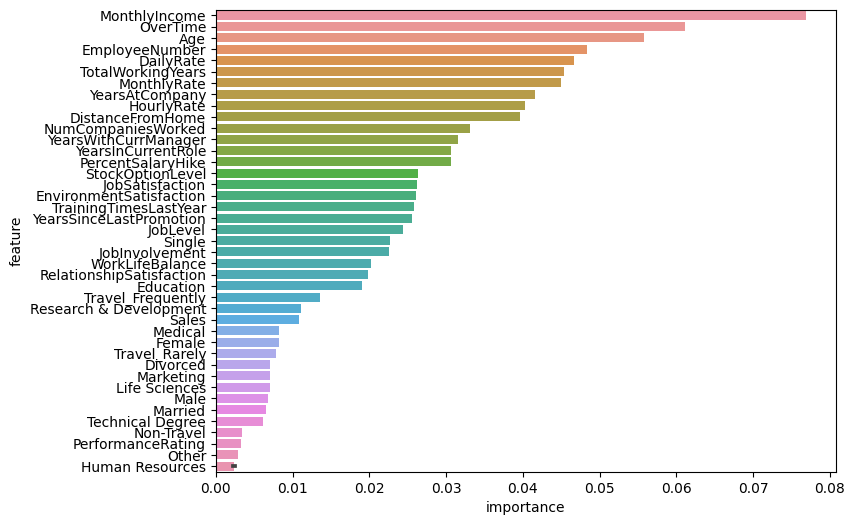

In [ ]:
feature_rank = pd.DataFrame({ 'feature': x.columns,'importance': rfc.feature_importances_ } )
## Sorting the features based on their importances with most important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending =False)
plt.figure(figsize=(8, 6))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

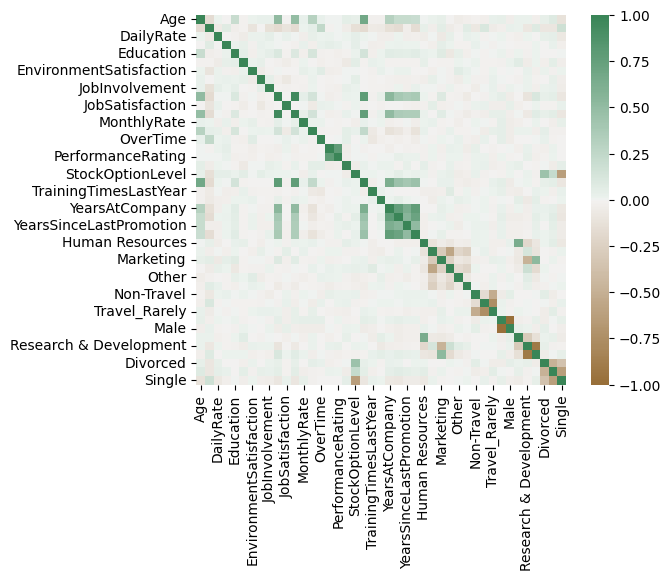

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_full_health = df2.corr()

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [ ]:
df2.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Travel_Frequently,Travel_Rarely,Female,Male,Human Resources,Research & Development,Sales,Divorced,Married,Single
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,...,-0.024743,0.028791,0.036311,-0.036311,0.020523,0.017883,-0.027549,0.033120,0.083919,-0.119185
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,0.115143,-0.049538,-0.029453,0.029453,0.016832,-0.085293,0.080855,-0.087716,-0.090984,0.175419
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,...,-0.011776,0.002078,0.011716,-0.011716,-0.026726,0.014871,-0.003616,0.037080,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.005081,-0.020116,0.001851,-0.001851,-0.012901,-0.008117,0.014085,-0.005440,0.030232,-0.027445
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.008292,0.004126,0.016547,-0.016547,0.011435,-0.018604,0.014215,-0.002439,-0.001865,0.004168
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.007980,-0.007976,-0.022556,0.022556,0.063431,-0.041923,0.015441,-0.025149,0.053933,-0.035189
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.012624,0.008496,-0.000508,0.000508,-0.007597,0.027976,-0.025606,0.016439,-0.022180,0.009035
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.018819,0.027541,0.000478,-0.000478,-0.016551,0.018686,-0.012047,-0.006150,0.036432,-0.033436
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.004424,0.026714,-0.017960,0.017960,0.004789,0.023187,-0.026107,0.016815,0.028324,-0.045253
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.021557,0.023433,0.039403,-0.039403,-0.006157,-0.107830,0.114307,0.037087,0.050547,-0.087072


In [ ]:
dt = tree.DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')

In [ ]:
model = dt.fit(x_train,y_train)

In [ ]:
predicted_data = model.predict(x_test)
predicted_data

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df2.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Human Resources', 'Life Sciences', 'Marketing',
       'Medical', 'Other', 'Technical Degree', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Female', 'Male',
       'Human Resources', 'Research & Development', 'Sales', 'Divorced',
       'Married', 'Single'],
      dtype='object')

In [ ]:
df2.feature_names = ['Age','DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Non-Travel', 'Travel_Frequently',
       'Travel_Rarely', 'Divorced', 'Married', 'Single', 'Human Resources',
       'Research & Development', 'Sales', 'Female', 'Male', 'Human Resources',
       'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']

In [ ]:
df2.target_names = ['Attrition']

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(dt,out_file = None, feature_names = df2.feature_names, filled = True , rounded = True, special_characters = True )

In [ ]:
graph = graphviz.Source(dot_data)

In [ ]:
graph.format = 'pdf'
graph.render(directory='doctest-output').replace('\\', '/')

'doctest-output/Source.gv.pdf'

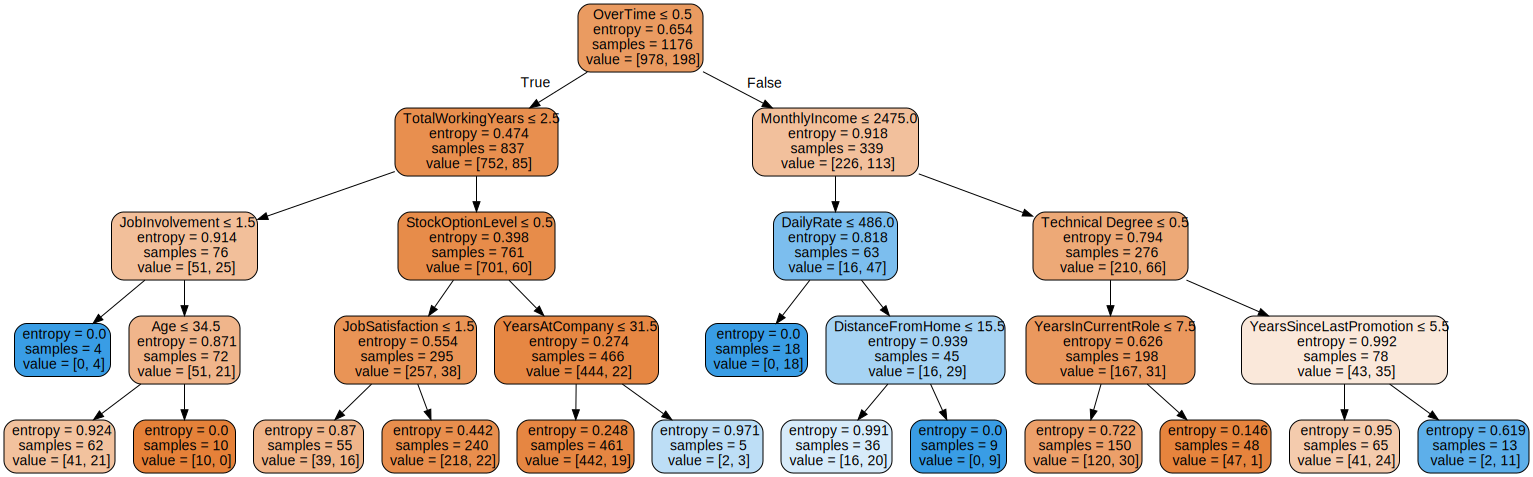

In [ ]:
graph

In [ ]:
x = df2.drop(['Attrition'], axis = 1)
y = df2["Attrition"]

In [ ]:
x_data = x.values
y_data = y.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [ ]:
accuracy_scores = []
confusion_matrices = []
model_names = []

In [ ]:

models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()
    }

In [ ]:

for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")

    # Cross-validation
    cross_val_scores = cross_val_score(model_instance, x, y, cv=5, scoring='accuracy')
    mean_cv_score = round(cross_val_scores.mean(), 3)

    # Fit the model
    model_instance.fit(x_train, y_train)

    # Make predictions
    y_pred = model_instance.predict(x_test)

    # Calculate accuracy score
    accuracy = round(accuracy_score(y_test, y_pred), 3)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

     # Append results to lists
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)

    # Store model names
    model_names.append(model_name)

    # Print results
    print("Cross-Validation Mean Accuracy:", mean_cv_score)
    print("Accuracy Score:", accuracy)
    print("Confusion Matrix:\n", cm)
    print("\n")

-----LogisticRegression-----
Cross-Validation Mean Accuracy: 0.84
Accuracy Score: 0.871
Confusion Matrix:
 [[255   0]
 [ 38   1]]


-----RandomForestClassifier-----
Cross-Validation Mean Accuracy: 0.859
Accuracy Score: 0.874
Confusion Matrix:
 [[253   2]
 [ 35   4]]


